In [1]:
import Merge_Cartesian 

from decimal import *
import math
import copy
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# This needs to be changed for your code
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\Jonathan\\Documents\\Academic\\Masters\\Simulator\\Git\\Main_Algorithm\\ffmpeg\\bin\\ffmpeg.exe'

In [2]:
import ipywidgets as widgets
from IPython.display import display

# Get Raw Wavefront Arrays

In [3]:
%matplotlib widget
L_Time = '77'
C_Time = '33'

L_impedance = '1000'
C_impedance = '1'

number_periods = '1'

#  INDUCTANCE, CAPACITANCE, LENGTH
Inductor_List = [L_impedance,L_Time,'1']
Capacitor_List = [C_impedance,C_Time,'1']

# VOLTAGE, PERIODS, BUCK, LOAD
Circuit_List = ['1',number_periods,False,'12']

In [4]:
(data_input,
data_output
) = Merge_Cartesian.Process_Wavefronts(Inductor_List,Capacitor_List, Circuit_List)

Time = data_output.Time
Voltage_Inductor = data_output.Voltage_Interconnect_Inductor
Current_Inductor = data_output.Current_Interconnect_Inductor
Voltage_Capacitor = data_output.Voltage_Interconnect_Capacitor
Current_Capacitor = data_output.Current_Interconnect_Capacitor
Wavefronts_Sending_Inductor = data_output.Wavefronts_Sending_Inductor
Wavefronts_Sending_Capacitor = data_output.Wavefronts_Sending_Capacitor
Wavefronts_Returning_Inductor = data_output.Wavefronts_Returning_Inductor
Wavefronts_Returning_Capacitor = data_output.Wavefronts_Returning_Capacitor


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        38500.0
Inductor Capacitance Per Length :       0.0385
Inductor Length :                       1
Inductor Total Inductance :             38500.0
Inductor Total Capacitance :            0.0385
Inductor Velocity :                     0.02597402597402597402597402597
Inductor Time Delay :                   38.5
Inductor Impedance :                    1000

- The Capacitor -
Capacitor Inductance Per Length :       16.5
Capacitor Capacitance Per Length :      16.5
Capacitor Length :                      1
Capacitor Total Inductance :            16.5
Capacitor Total Capacitance :           16.5
Capacitor Velocity :                    0.06060606060606060606060606061
Capacitor Time Delay :                  16.5
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  5007.860299885706807460523526
Number of Wavefronts :    

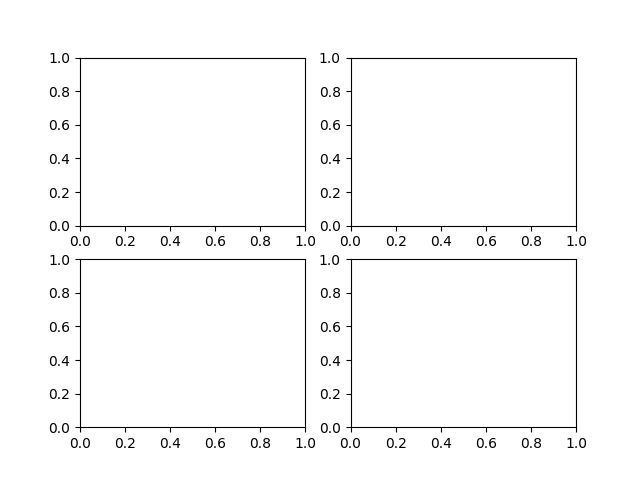

In [5]:
fig_initial_colour, ax_initial_colour = plt.subplot_mosaic([['A','B'],['C','D']])

In [6]:
Merge_Cartesian.plot_fanout_seismic(data_output.Voltage_Interconnect_Inductor,ax_initial_colour['A'],"Inductor Voltage Fanout",True,True)
Merge_Cartesian.plot_fanout_seismic(data_output.Voltage_Interconnect_Capacitor,ax_initial_colour['B'],"Capacitor Voltage Fanout",True)
Merge_Cartesian.plot_fanout_seismic(data_output.Current_Interconnect_Inductor,ax_initial_colour['C'],"Inductor Current Fanout",True)
Merge_Cartesian.plot_fanout_seismic(data_output.Current_Interconnect_Capacitor,ax_initial_colour['D'],"Capacitor Current Fanout",True)

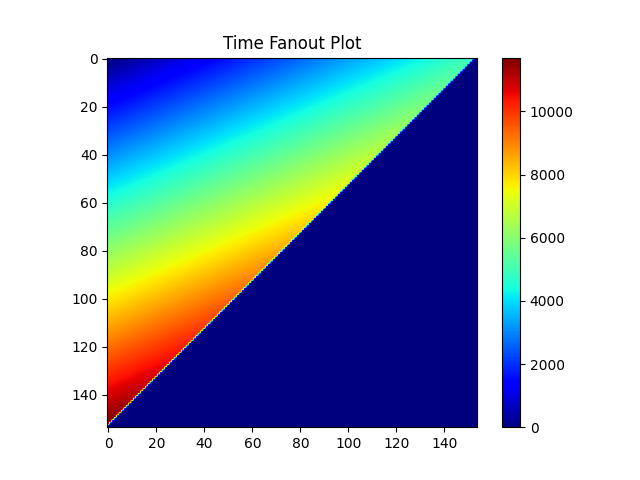

In [7]:
fig_time, ax_time = plt.subplots()

Merge_Cartesian.plot_fanout_colour(data_output.Time,ax_time,"Time Fanout Plot")

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Nx,Ny = Voltage_Capacitor.shape
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)

ax.plot_surface(X,Y,Voltage_Capacitor,cmap=cm.coolwarm)

# Trying to understand Fanout Frequency

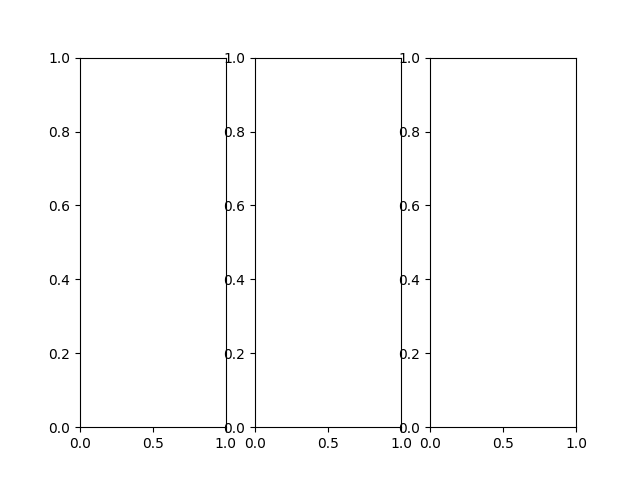

In [8]:
fig_cross, ax_cross = plt.subplots(1,3)

In [9]:
Merge_Cartesian.plot_fanout_crossection(Merge_Cartesian.get_voltage_array (data_output.Wavefronts_Sending_Capacitor),ax_cross,60,"Capacitor Sending Voltage",False)

# Higher Order Merging
-----

## Visualising merigng steps iteritevly

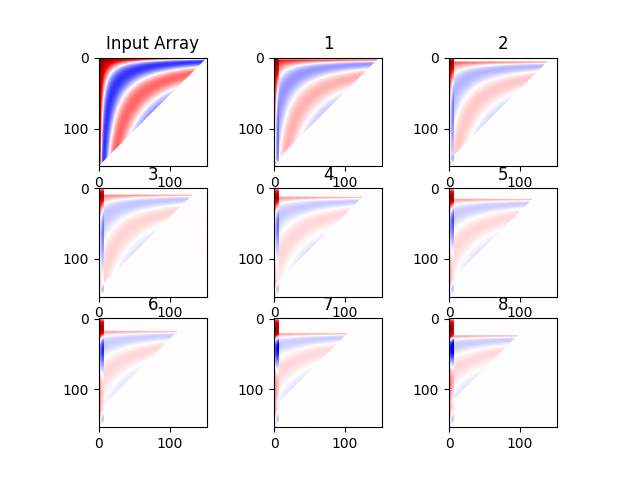

In [10]:
a = data_input.a
b = data_input.b

if(data_input.is_Higher_Merging):

    # Frist Row
    fig_merge,ax_merge = plt.subplots(3,3)
    Merge_Cartesian.plot_fanout_seismic(data_output.Voltage_Interconnect_Capacitor, ax_merge[0,0],"Input Array",False)

    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(data_output.Voltage_Interconnect_Capacitor,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[0,1],"1",False)

    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(voltage_capacitor_merged,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[0,2],"2",False)


    # Second Row
    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(voltage_capacitor_merged,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[1,0],"3",False)

    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(voltage_capacitor_merged,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[1,1],"4",False)

    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(voltage_capacitor_merged,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[1,2],"5",False)


    # Third Row
    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(voltage_capacitor_merged,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[2,0],"6",False)

    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(voltage_capacitor_merged,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[2,1],"7",False)

    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(voltage_capacitor_merged,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[2,2],"8",False)


## Doing full Merging Cycle

In [11]:
data_output_merged = Merge_Cartesian.Higher_Order_Merging(data_input,data_output)

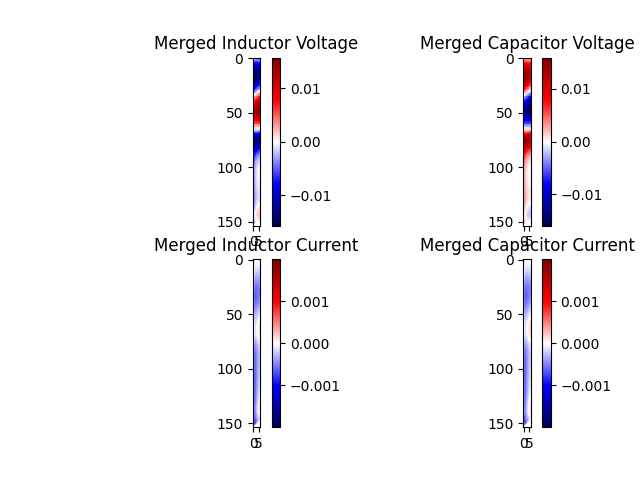

In [12]:
fig_merged, ax_merged = plt.subplot_mosaic([['A','B'],['C','D']])

Merge_Cartesian.plot_fanout_seismic(data_output_merged.Voltage_Interconnect_Inductor,ax_merged['A'],"Merged Inductor Voltage",True,True)
Merge_Cartesian.plot_fanout_seismic(data_output_merged.Current_Interconnect_Inductor,ax_merged['C'],"Merged Inductor Current",True)

Merge_Cartesian.plot_fanout_seismic(data_output_merged.Voltage_Interconnect_Capacitor,ax_merged['B'],"Merged Capacitor Voltage",True)
Merge_Cartesian.plot_fanout_seismic(data_output_merged.Current_Interconnect_Capacitor,ax_merged['D'],"Merged Capacitor Current",True)


## Order merged output

In [14]:
latest_time = 0

x_index = 0
y_index = 0

option_time = []
option_indexes =[]

out_time = []
out_indexes = []

out_voltage_inductor = []
out_current_inductor = []

out_voltage_capacitor = []
out_current_capacitor = []

Marked = np.zeros(Time.shape,dtype=Time.dtype)

def store_options(input_arr,x,y,magnitude,indexes):
    x_size,y_size = input_arr.shape
    
    
    if(x+1 < x_size and Marked[x+1,y] == 0):
        
        option_a = input_arr[x+1,y]
        magnitude.append(option_a)
        indexes.append([x+1,y])
        Marked[x+1,y] = 1
    
    if(y+1 < y_size and Marked[x,y+1] == 0):
        
        option_b = input_arr[x,y+1]
        magnitude.append(option_b)
        indexes.append([x,y+1])
        Marked[x,y+1] = 1
    
def get_best_option_value_index(opt_arr,opt_indexes):
    opt_index_min = np.argmin(opt_arr)
    
    value = opt_arr[opt_index_min]
    del opt_arr[opt_index_min]
    
    index = opt_indexes[opt_index_min]
    del opt_indexes[opt_index_min]
    
    return value, index


# Store Initial Point
out_time.append(Time_Merged[0,0])
out_indexes.append([0,0])

out_voltage_inductor.append(voltage_inductor_merged[0,0])
out_current_inductor.append(current_inductor_merged[0,0])

out_voltage_capacitor.append(voltage_capacitor_merged[0,0])
out_current_capacitor.append(current_capacitor_merged[0,0])

Marked[0,0] = 1

while latest_time < data_input.Simulation_Stop_Time:
    
    # store options at location
    store_options(Time_Merged,x_index,y_index,option_time,option_indexes)
    
    
    if(len(option_time) > 0):
        # get best option
        best_time, best_time_index = get_best_option_value_index(option_time,option_indexes)
        
        out_time.append(best_time)
        out_indexes.append(best_time_index)
        
        out_voltage_inductor.append(voltage_inductor_merged[best_time_index[0],best_time_index[1]])
        out_current_inductor.append(current_inductor_merged[best_time_index[0],best_time_index[1]])
        
        out_voltage_capacitor.append(voltage_capacitor_merged[best_time_index[0],best_time_index[1]] )
        out_current_capacitor.append(current_capacitor_merged[best_time_index[0],best_time_index[1]] )
        
        Marked[best_time_index[0],best_time_index[1]]  = 2
    
    latest_time = best_time
    x_index, y_index = best_time_index

NameError: name 'Time_Merged' is not defined

In [ ]:
if(data_input.is_Higher_Merging):
    voltage_capacitor_merged = voltage_capacitor_merged [0:out_indexes[-1][0],:]
    current_capacitor_merged = current_capacitor_merged [0:out_indexes[-1][0],:]

In [ ]:
fig_series_voltage,ax_series_voltage =plt.subplots()

plt.title("Voltage Capacitor Wavefront Values")
plt.step(out_time,out_voltage_capacitor,where='post')


In [ ]:
integrated_voltage = np.cumsum(out_voltage_capacitor)  
plt.figure()

plt.subplot(1,2,1)
plt.title("Voltage Capacitor")
plt.step(out_time,integrated_voltage,where='post')

plt.subplot(1,2,2)
plt.title("Capacitor Voltage Merged and Cropped")

c = plt.imshow(voltage_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_capacitor_merged), vmin = - np.max(voltage_capacitor_merged))
plt.colorbar(c)

for i,index in enumerate(out_indexes):
    if(i  == 0):
        pass
    else:
        x1 = out_indexes[i-1][0]
        y1 = out_indexes[i-1][1]
        
        x2 = index[0]
        y2 = index[1]
        plt.plot([y1,y2],[x1,x2],'black')
    
    

In [ ]:
integrated_current = np.cumsum(out_current_capacitor)  
ax = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AC
    BC
    """
)

ax["A"].set_title("Current Capacitor Wavefronts")
ax["A"].step(out_time,out_current_capacitor,where='post')


ax["B"].set_title("Current Capacitor ")
ax["B"].step(out_time,integrated_current,where='post')

ax["C"].set_title("Current Capacitor Fanout")
c = ax["C"].imshow(current_capacitor_merged.astype(np.float),cmap=cm.seismic,vmax =np.max(voltage_capacitor_merged), vmin = - np.max(voltage_capacitor_merged))
# plt.colorbar(c,ax = ax["C"])

for i,index in enumerate(out_indexes):
    if(i  == 0):
        pass
    else:
        x1 = out_indexes[i-1][0]
        y1 = out_indexes[i-1][1]
        
        x2 = index[0]
        y2 = index[1]
        ax["C"].plot([y1,y2],[x1,x2],'black')


# Wavefront Positions at Time

In [ ]:
def plot_spatial_at_time(Time, SW, RW, fig_spatial,ax_spatial ,title_str):
    
    ax_spatial[0].cla()
    ax_spatial[1].cla()

    termination_length = 1
        
    if (type(Time) != Decimal):
            raise TypeError("Time must me Decimal")
        
    if("Capacitor".lower() in title_str.lower()):
        termination_length = data_input.Capacitor_Length
    elif("Inductor".lower() in title_str.lower()):
        termination_length = data_input.Inductor_Length
    else:
        raise RuntimeWarning("Name your plots correctly, assuming length to be 1")
    
    def get_spatial_zip(time_enquirey, Sending_Wavefronts, Returning_Wavefronts):
        
        dc_voltage = 0
        dc_current = 0

        send_position = []
        send_value_voltage = []
        send_value_current = []

        return_position = []
        return_value_voltage = []
        return_value_current = []

        for index in out_indexes:
            x = index[0]
            y = index[1]
                
            sending_wavefront = Sending_Wavefronts[x,y]
            returning_wavefront = Returning_Wavefronts[x,y]
                
            if(sending_wavefront.time_start > time_enquirey): # Finished
                break
                
            elif(returning_wavefront.time_end <= time_enquirey): # Both DC
                dc_voltage += sending_wavefront.magnitude_voltage
                dc_current += sending_wavefront.magnitude_current
                    
                dc_voltage += returning_wavefront.magnitude_voltage
                dc_current += returning_wavefront.magnitude_current
                    
            elif(returning_wavefront.time_end >= time_enquirey and returning_wavefront.time_start < time_enquirey): # Returning Intercept, Sending DC
                return_position.append(returning_wavefront.Position_at_time(time_enquirey))
                return_value_voltage.append(returning_wavefront.magnitude_voltage)
                return_value_current.append(returning_wavefront.magnitude_current)
                    
                dc_voltage += sending_wavefront.magnitude_voltage
                dc_current += sending_wavefront.magnitude_current
                    
            elif(sending_wavefront.time_end >= time_enquirey and sending_wavefront.time_start <= time_enquirey): # Sending Intercept
                send_position.append(sending_wavefront.Position_at_time(time_enquirey))
                send_value_voltage.append(sending_wavefront.magnitude_voltage)
                send_value_current.append(sending_wavefront.magnitude_current)
                    
            else:
                raise Exception("Somethings wrong, wavefront has to be intecepted/ stored or done")
                
        termination_value_voltage = dc_voltage
        interconnect_value_voltage =  dc_voltage
            
        termination_value_current = dc_current
        interconnect_value_current =  dc_current

        position_all = []
        value_left_voltage = []
        value_right_voltage = []
            
        value_left_current = []
        value_right_current = []

            # input sending values in output form, make all DC value
        for i, pos in enumerate(send_position):
            position_all.append(pos)
                
            value_left_voltage.append(dc_voltage)
            value_right_voltage.append(dc_voltage)
            interconnect_value_voltage += send_value_voltage[i]
                
            value_left_current.append(dc_current)
            value_right_current.append(dc_current)
            interconnect_value_current += send_value_current[i]
                
            if (pos ==data_input.Capacitor_Length):
                pass
                    # raise Exception("Sending wavefront at termination, problematic")

            # input returning values in output form, make all DC value
        for i, pos in enumerate(return_position):
            position_all.append(pos)
                
            value_left_voltage.append(dc_voltage)
            value_right_voltage.append(dc_voltage)
            termination_value_voltage += return_value_voltage[i]
                
            value_left_current.append(dc_current)
            value_right_current.append(dc_current)
                
            termination_value_current += return_value_current[i]
                
            if (pos ==0):
                pass
                raise Exception("Returning wavefront at interconnect, problematic")

            # add values left and right
        for i,position in enumerate(position_all):
            for j, send_pos in enumerate(send_position):
                if(send_pos> position):
                    value_left_voltage[i] += send_value_voltage[j]
                    value_right_voltage[i] += send_value_voltage[j]
                        
                    value_left_current[i] += send_value_current[j]
                    value_right_current[i] += send_value_current[j]
                        
                if (send_pos == position ):
                    value_left_voltage[i] += send_value_voltage[j]
                        
                    value_left_current[i] += send_value_current[j]
                    
            for j, return_pos in enumerate(return_position):
                if(return_pos< position):
                    value_left_voltage[i] += return_value_voltage[j]
                    value_right_voltage[i] += return_value_voltage[j]
                        
                    value_left_current[i] += return_value_current[j]
                    value_right_current[i] += return_value_current[j]
                        
                if (return_pos == position ):
                    value_right_voltage[i] += return_value_voltage[j]
                        
                    value_right_current[i] += return_value_current[j]
                        
            # append interconnect
        position_all.append(0)
            
        value_left_voltage.append(interconnect_value_voltage)
        value_right_voltage.append(interconnect_value_voltage)
            
        value_left_current.append(interconnect_value_current)
        value_right_current.append(interconnect_value_current)

            # append termination
        position_all.append(termination_length)
                
        value_left_voltage.append(termination_value_voltage)
        value_right_voltage.append(termination_value_voltage)
            
        value_left_current.append(termination_value_current)
        value_right_current.append(termination_value_current)

            # sort values
        zip_positions_voltage_current = sorted(zip(position_all,value_left_voltage,value_right_voltage,value_left_current,value_right_current))
        position_all, value_left_voltage, value_right_voltage, value_left_current, value_right_current = zip(*zip_positions_voltage_current)
            
            # convert to lists
        position_all = list(position_all)
            
        value_left_voltage = list(value_left_voltage)
        value_right_voltage = list(value_right_voltage)
            
        value_left_current = list(value_left_current)
        value_right_current = list(value_right_current)
            
            # Merge neighbours
        found_duplicate = True
            
        while found_duplicate:
            found_duplicate = False
            for index,position in enumerate(position_all):
                if(index < len(position_all)-1):
                    if(position == position_all[index+1]):
                        value_left_voltage[index] += value_left_voltage[index +1]
                        value_right_voltage[index] += value_right_voltage[index +1]
                            
                        value_left_current[index] += value_left_current[index +1]
                        value_right_current[index] += value_right_current[index +1]
                            
                        del position_all[index +1]
                        del value_left_voltage[index +1]
                        del value_right_voltage[index +1]
                        del value_left_current[index +1]
                        del value_right_current[index +1]

                        found_duplicate = True
                            
        
        return position_all,value_left_voltage,value_right_voltage,value_left_current,value_right_current


    pos_all, value_lv, value_rv, value_lc, value_rc = get_spatial_zip(Time, SW, RW)
    zip_out = zip(pos_all, value_lv, value_rv, value_lc, value_rc)
    
    # Create Plot
    fig_spatial.suptitle(title_str + str(Time.quantize(Decimal('.0001'), rounding=ROUND_HALF_DOWN)) + "s")
    
    ax_spatial[0].set_title("Voltage")
    ax_spatial[1].set_title("Current")

    x = 0
    x_old = 0
    
    
    y1_voltage = 0
    y2_voltage = 0
    y_voltage_old = value_lv[0]
    
    y1_current = 0
    y2_current = 0
    y_current_old = value_lc[0]
    
    
    ax_spatial[0].plot([0,0],[0,y_voltage_old],'k--')
    ax_spatial[1].plot([0,0],[0,y_current_old],'k--')

    for (position, left_voltage, right_voltage, left_current, right_current) in zip_out:
        x = position
        
        y1_voltage = left_voltage
        y2_voltage = right_voltage
        
        y1_current = left_current
        y2_current = right_current
        
        ax_spatial[0].plot([x_old,x], [y_voltage_old,y1_voltage],'k-')
        ax_spatial[0].plot([x,x] ,   [y1_voltage,y2_voltage])
        
        ax_spatial[1].plot([x_old,x], [y_current_old,y1_current],'k-')
        ax_spatial[1].plot([x,x],    [y1_current,y2_current])
        
        x_old = x
        
        y_voltage_old = y2_voltage
        y_current_old = y2_current
        
    
    ax_spatial[0].plot([termination_length,termination_length],[0,y_voltage_old],'k--')
    ax_spatial[1].plot([termination_length,termination_length],[0,y_current_old],'k--')

In [ ]:
def plot_spatial_at_time_4(Time, SW_L, RW_L, SW_C, RW_C, fig_spatial,ax_spatial ,title_str):
    
    ax_spatial['A'].cla()
    ax_spatial['B'].cla()
    ax_spatial['C'].cla()
    ax_spatial['D'].cla()

    termination_length = 1
        
    if (type(Time) != Decimal):
            raise TypeError("Time must me Decimal")
        
    if("Capacitor".lower() in title_str.lower()):
        termination_length = data_input.Capacitor_Length
    elif("Inductor".lower() in title_str.lower()):
        termination_length = data_input.Inductor_Length
    else:
        raise RuntimeWarning("Name your plots correctly, assuming length to be 1")
    
    def get_spatial_zip(time_enquirey, Sending_Wavefronts, Returning_Wavefronts):
        
        dc_voltage = Decimal('0')
        dc_current = Decimal('0')

        send_position = []
        send_value_voltage = []
        send_value_current = []

        return_position = []
        return_value_voltage = []
        return_value_current = []

        for index in out_indexes:
            x = index[0]
            y = index[1]
                
            sending_wavefront = Sending_Wavefronts[x,y]
            returning_wavefront = Returning_Wavefronts[x,y]
                
            if(sending_wavefront.time_start > time_enquirey): # Finished
                break
                
            elif(returning_wavefront.time_end <= time_enquirey): # Both DC
                dc_voltage += sending_wavefront.magnitude_voltage
                dc_current += sending_wavefront.magnitude_current
                    
                dc_voltage += returning_wavefront.magnitude_voltage
                dc_current += returning_wavefront.magnitude_current
                    
            elif(returning_wavefront.time_end >= time_enquirey and returning_wavefront.time_start < time_enquirey): # Returning Intercept, Sending DC
                return_position.append(returning_wavefront.Position_at_time(time_enquirey))
                return_value_voltage.append(returning_wavefront.magnitude_voltage)
                return_value_current.append(returning_wavefront.magnitude_current)
                    
                dc_voltage += sending_wavefront.magnitude_voltage
                dc_current += sending_wavefront.magnitude_current
                    
            elif(sending_wavefront.time_end >= time_enquirey and sending_wavefront.time_start <= time_enquirey): # Sending Intercept
                send_position.append(sending_wavefront.Position_at_time(time_enquirey))
                send_value_voltage.append(sending_wavefront.magnitude_voltage)
                send_value_current.append(sending_wavefront.magnitude_current)
                    
            else:
                raise Exception("Somethings wrong, wavefront has to be intecepted/ stored or done")
                
        termination_value_voltage = dc_voltage
        interconnect_value_voltage =  dc_voltage
            
        termination_value_current = dc_current
        interconnect_value_current =  dc_current

        position_all = []
        value_left_voltage = []
        value_right_voltage = []
            
        value_left_current = []
        value_right_current = []

            # input sending values in output form, make all DC value
        for i, pos in enumerate(send_position):
            position_all.append(pos)
                
            value_left_voltage.append(dc_voltage)
            value_right_voltage.append(dc_voltage)
            interconnect_value_voltage += send_value_voltage[i]
                
            value_left_current.append(dc_current)
            value_right_current.append(dc_current)
            interconnect_value_current += send_value_current[i]
                
            if (pos ==data_input.Capacitor_Length):
                pass
                    # raise Exception("Sending wavefront at termination, problematic")

            # input returning values in output form, make all DC value
        for i, pos in enumerate(return_position):
            position_all.append(pos)
                
            value_left_voltage.append(dc_voltage)
            value_right_voltage.append(dc_voltage)
            termination_value_voltage += return_value_voltage[i]
                
            value_left_current.append(dc_current)
            value_right_current.append(dc_current)
                
            termination_value_current += return_value_current[i]
                
            if (pos ==0):
                pass
                raise Exception("Returning wavefront at interconnect, problematic")

            # add values left and right
        for i,position in enumerate(position_all):
            for j, send_pos in enumerate(send_position):
                if(send_pos> position):
                    value_left_voltage[i] += send_value_voltage[j]
                    value_right_voltage[i] += send_value_voltage[j]
                        
                    value_left_current[i] += send_value_current[j]
                    value_right_current[i] += send_value_current[j]
                        
                if (send_pos == position ):
                    value_left_voltage[i] += send_value_voltage[j]
                        
                    value_left_current[i] += send_value_current[j]
                    
            for j, return_pos in enumerate(return_position):
                if(return_pos< position):
                    value_left_voltage[i] += return_value_voltage[j]
                    value_right_voltage[i] += return_value_voltage[j]
                        
                    value_left_current[i] += return_value_current[j]
                    value_right_current[i] += return_value_current[j]
                        
                if (return_pos == position ):
                    value_right_voltage[i] += return_value_voltage[j]
                        
                    value_right_current[i] += return_value_current[j]
                        
            # append interconnect
        position_all.append(0)
            
        value_left_voltage.append(interconnect_value_voltage)
        value_right_voltage.append(interconnect_value_voltage)
            
        value_left_current.append(interconnect_value_current)
        value_right_current.append(interconnect_value_current)

            # append termination
        position_all.append(termination_length)
                
        value_left_voltage.append(termination_value_voltage)
        value_right_voltage.append(termination_value_voltage)
            
        value_left_current.append(termination_value_current)
        value_right_current.append(termination_value_current)

            # sort values
        zip_positions_voltage_current = sorted(zip(position_all,value_left_voltage,value_right_voltage,value_left_current,value_right_current))
        position_all, value_left_voltage, value_right_voltage, value_left_current, value_right_current = zip(*zip_positions_voltage_current)
            
            # convert to lists
        position_all = list(position_all)
            
        value_left_voltage = list(value_left_voltage)
        value_right_voltage = list(value_right_voltage)
            
        value_left_current = list(value_left_current)
        value_right_current = list(value_right_current)
            
            # Merge neighbours
        found_duplicate = True
        while found_duplicate:
            found_duplicate = False
            for index,position in enumerate(position_all):
                if(index < len(position_all)-1):
                    if(position == position_all[index+1]):
                        value_left_voltage[index] += value_left_voltage[index +1]
                        value_right_voltage[index] += value_right_voltage[index +1]
                            
                        value_left_current[index] += value_left_current[index +1]
                        value_right_current[index] += value_right_current[index +1]
                            
                        del position_all[index +1]
                        del value_left_voltage[index +1]
                        del value_right_voltage[index +1]
                        del value_left_current[index +1]
                        del value_right_current[index +1]

                        found_duplicate = True
                            
        
        return position_all,value_left_voltage,value_right_voltage,value_left_current,value_right_current


    pos_all, value_lv, value_rv, value_lc, value_rc = get_spatial_zip(Time, SW_L, RW_L)
    zip_out = zip(pos_all, value_lv, value_rv, value_lc, value_rc)
    
    # Create Plot
    fig_spatial.suptitle(title_str + str(Time.quantize(Decimal('.0001'), rounding=ROUND_HALF_DOWN)) + "s")

    x = 0
    x_old = 0
    
    
    y1_voltage = 0
    y2_voltage = 0
    y_voltage_old = value_lv[0]
    
    y1_current = 0
    y2_current = 0
    y_current_old = value_lc[0]
    
    ax_spatial["A"].set_title(str(value_rv[-1].quantize(Decimal('0.0001')))+"   ←   Voltage Inductor   →   "+str(y_voltage_old.quantize(Decimal('.0001'))))
    ax_spatial["C"].set_title(str(value_rc[-1].quantize(Decimal('0.0001')))+"   ←   Current Inductor   →   "+str(y_current_old.quantize(Decimal('.0001'))))
    
    ax_spatial["A"].plot([0,0],[0,y_voltage_old],'k--')
    ax_spatial["C"].plot([0,0],[0,y_current_old],'k--')

    for (position, left_voltage, right_voltage, left_current, right_current) in zip_out:
        x = position
        
        y1_voltage = left_voltage
        y2_voltage = right_voltage
        
        y1_current = left_current
        y2_current = right_current
        
        ax_spatial["A"].plot([x_old,x], [y_voltage_old,y1_voltage],'k-')
        ax_spatial["A"].plot([x,x] ,   [y1_voltage,y2_voltage])
        
        ax_spatial["C"].plot([x_old,x], [y_current_old,y1_current],'k-')
        ax_spatial["C"].plot([x,x],    [y1_current,y2_current])
        
        x_old = x
        
        y_voltage_old = y2_voltage
        y_current_old = y2_current
        
    
    ax_spatial["A"].plot([termination_length,termination_length],[0,y_voltage_old],'k--')
    ax_spatial["C"].plot([termination_length,termination_length],[0,y_current_old],'k--')
    
    ax_spatial["A"].invert_xaxis()
    ax_spatial["C"].invert_xaxis()
    
    ## PLOT 2
    
    pos_all, value_lv, value_rv, value_lc, value_rc = get_spatial_zip(Time, SW_C, RW_C)
    zip_out = zip(pos_all, value_lv, value_rv, value_lc, value_rc)

    # Create Plot
    fig_spatial.suptitle(title_str + str(Time.quantize(Decimal('.0001'), rounding=ROUND_HALF_DOWN)) + "s")
    

    x = 0
    x_old = 0
    
    
    y1_voltage = 0
    y2_voltage = 0
    y_voltage_old = value_lv[0]
    
    y1_current = 0
    y2_current = 0
    y_current_old = value_lc[0]
    
    ax_spatial["B"].set_title(str(y_voltage_old.quantize(Decimal('.0001')))+"   ←   Voltage Capacitor   →   "+str(value_rv[-1].quantize(Decimal('.0001'))))
    ax_spatial["D"].set_title(str(y_current_old.quantize(Decimal('.0001')))+"   ←   Current Capacitor   →   "+str(value_rc[-1].quantize(Decimal('.0001'))))
    
    ax_spatial["B"].plot([0,0],[0,y_voltage_old],'k--')
    ax_spatial["D"].plot([0,0],[0,y_current_old],'k--')

    for (position, left_voltage, right_voltage, left_current, right_current) in zip_out:
        x = position
        
        y1_voltage = left_voltage
        y2_voltage = right_voltage
        
        y1_current = left_current
        y2_current = right_current
        
        ax_spatial["B"].plot([x_old,x], [y_voltage_old,y1_voltage],'k-')
        ax_spatial["B"].plot([x,x] ,   [y1_voltage,y2_voltage])
        
        ax_spatial["D"].plot([x_old,x], [y_current_old,y1_current],'k-')
        ax_spatial["D"].plot([x,x],    [y1_current,y2_current])
        
        x_old = x
        
        y_voltage_old = y2_voltage
        y_current_old = y2_current
        
    
    ax_spatial["B"].plot([termination_length,termination_length],[0,y_voltage_old],'k--')
    ax_spatial["D"].plot([termination_length,termination_length],[0,y_current_old],'k--')

In [ ]:
fig_s,ax_s = plt.subplot_mosaic(
    """
    AB
    CD
    """
)
# fig_s2,ax_s2 = plt.subplots(2,1)

increment_button = widgets.Button(description = "step forward", layout=widgets.Layout(width='auto'))
decrement_button = widgets.Button(description = "step backward", layout=widgets.Layout(width='auto'))
increment_text = widgets.FloatText(description = 'val', value=0.1)


time_slider = widgets.FloatSlider(value=0, min =0, max = data_input.Simulation_Stop_Time, layout=widgets.Layout(width='auto'))
output = widgets.Output()

def on_increment_click(b):
    time_slider.value += increment_text.value
    plot_spatial_at_time_4(Decimal(str(time_slider.value)),Wavefronts_Sending_Inductor_merged,Wavefronts_Returning_Inductor_merged,Wavefronts_Sending_Capacitor_merged,Wavefronts_Returning_Capacitor_merged,fig_s,ax_s,"Spatial Voltage Accumulation in Inductor at time ")
    # plot_spatial_at_time(Decimal(str(time_slider.value)),Wavefronts_Sending_Capacitor_merged,Wavefronts_Returning_Capacitor_merged,fig_s2,ax_s2,"Spatial Voltage Accumulation in Capacitor at time ")
    
def on_decrement_click(b):
    time_slider.value -= increment_text.value
    plot_spatial_at_time_4(Decimal(str(time_slider.value)),Wavefronts_Sending_Inductor_merged,Wavefronts_Returning_Inductor_merged,Wavefronts_Sending_Capacitor_merged,Wavefronts_Returning_Capacitor_merged,fig_s,ax_s,"Spatial Voltage Accumulation in Inductor at time ")
    # plot_spatial_at_time(Decimal(str(time_slider.value)),Wavefronts_Sending_Capacitor_merged,Wavefronts_Returning_Capacitor_merged,fig_s2,ax_s2,"Spatial Voltage Accumulation in Capacitor at time ")
    
def handle_slider_change(change):
    if(isinstance(change.new,dict)):
        if(len(change.new) > 0):
            change_str = str(change.new['value'])
            plot_spatial_at_time_4(Decimal(change_str),Wavefronts_Sending_Inductor_merged,Wavefronts_Returning_Inductor_merged,Wavefronts_Sending_Capacitor_merged,Wavefronts_Returning_Capacitor_merged,fig_s,ax_s,"Spatial Voltage Accumulation in Inductor at time ")
            # plot_spatial_at_time(Decimal(change_str),Wavefronts_Sending_Capacitor_merged,Wavefronts_Returning_Capacitor_merged,fig_s2,ax_s2,"Spatial Voltage Accumulation in Capacitor at time ")

increment_button.on_click(on_increment_click)
decrement_button.on_click(on_decrement_click)
time_slider.observe(handle_slider_change)

increment_grid = widgets.GridspecLayout(1,3)
increment_grid[0,0] = decrement_button
increment_grid[0,1] = increment_button
increment_grid[0,2] = increment_text

display(increment_grid,time_slider)


In [ ]:
save_title = widgets.Label('Video Saving Widget!!')
save_sub_title = widgets.Label('Max Simulation time = ' + str(data_input.Simulation_Stop_Time.quantize(Decimal('0.01'))))

fps_toggle = widgets.ToggleButtons(
    options=['15', '30', '60'],
    description='fps:',
)

start_input = widgets.FloatText(value=0)
end_input = widgets.FloatText(value=data_input.Simulation_Stop_Time)
video_length_input = widgets.FloatText(value=5)
dpi_input = widgets.FloatText(value=100)

duration_bar = widgets.HBox([
    widgets.Label("Start time : "),
    start_input,
    widgets.Label("End time : "),
    end_input,
    widgets.Label("Video Length : "),
    video_length_input,
    widgets.Label("DPI : "),
    dpi_input
])

save_ext = widgets.Output(layout={})
save_ext.append_stdout('.mp4')


ProgressBar = widgets.IntProgress(min=0, max=int(100)) # instantiate the bar
ProgressBar_Label = widgets.Label("Ready when you are !  ")

save_name = widgets.Text(placeholder='Type Filename')
save_button = widgets.Button(description = "save video")

save_name_grid = widgets.HBox([save_name,save_ext,save_button])
   
def on_save_click (b):
    if(save_name.value==''):
        raise Exception("Enter Valid File name")
    else:
        number_frames =  video_length_input.value*float(fps_toggle.value)
        time_increment = (end_input.value - start_input.value)/number_frames
        
        ProgressBar.max = number_frames
        metadata = dict(title='Distributed Modelling', artist='Jonathan Meerholz')
        writer = FFMpegWriter(fps=float(fps_toggle.value), metadata=metadata)
        
        time = start_input.value
        frame_counter = 0
        ProgressBar.value = 0
        with writer.saving(fig_s, (save_name.value+".mp4"), float(dpi_input.value)):
            
            for _ in range(0,int(number_frames)):
                
                plot_spatial_at_time_4(Decimal(str(time)),Wavefronts_Sending_Inductor_merged,Wavefronts_Returning_Inductor_merged,Wavefronts_Sending_Capacitor_merged,Wavefronts_Returning_Capacitor_merged,fig_s,ax_s,"Spatial Voltage Accumulation in Inductor at time ")
                # plot_spatial_at_time(time,Wavefronts_Sending_Capacitor_merged,Wavefronts_Returning_Capacitor_merged,fig_s,ax_s,"Spatial Voltage Accumulation in Capacitor at time ")
                writer.grab_frame()
                time += time_increment
                frame_counter +=1
                ProgressBar.value =frame_counter
                ProgressBar_Label.value = "frame " + str(frame_counter) + " of " + str(number_frames) 
                
        ProgressBar_Label.value += " Completed !"

save_button.on_click(on_save_click)

display(save_title,save_sub_title,fps_toggle,duration_bar,save_name_grid,widgets.HBox([ProgressBar_Label,ProgressBar]))

## Gradient Follow

In [ ]:
A = Decimal(L_Time)
B = Decimal(C_Time)

LCM , GCF = Merge_Cartesian.lcm_gcd(A,B)

a = int((B)/(GCF))
b = int((A)/(GCF))

A_to_B_x = 0
A_to_B_y = 0

for  y in range(1,data_input.Number_of_Wavefronts):
    
    if( (y*B - GCF )%A == 0):
        A_to_B_x = (y*B - GCF)/A
        A_to_B_y = y
        break
    
    if(y == data_input.Number_of_Wavefronts -1):
        print('Eish')
        

B_to_A_x = 0
B_to_A_y = 0

for  y in range(1,data_input.Number_of_Wavefronts):
    
    if( (y*B + GCF )%A == 0):
        B_to_A_x = (y*B + GCF)/A
        B_to_A_y = y
        break
    
    if(y == data_input.Number_of_Wavefronts -1):
        print('Eish')

print('A :',A)
print('B :',B)
print('GCF :',GCF)
print('LCM :',LCM)
print('a :',a)
print('b :',b)
print('A_to_B_x : ' + str(A_to_B_x))
print('A_to_B_y : ' + str(A_to_B_y))
print('B_to_A_x : ' + str(B_to_A_x))
print('B_to_A_y : ' + str(B_to_A_y))

In [ ]:
data_input.Number_of_Wavefronts